In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

In [37]:
custom_date_parser = lambda x:datetime.strptime(x , "%Y-%m-%d")

In [38]:
df = pd.read_csv(r'C:\Users\GAMES\Downloads\HIRSHI\ARIMA\features.csv', parse_dates=['Date'],date_parser=custom_date_parser)

In [39]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [41]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
df.shape

(2069, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 92 to 8175
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         2069 non-null   int64         
 1   Date          2069 non-null   datetime64[ns]
 2   Temperature   2069 non-null   float64       
 3   Fuel_Price    2069 non-null   float64       
 4   MarkDown1     2069 non-null   float64       
 5   MarkDown2     2069 non-null   float64       
 6   MarkDown3     2069 non-null   float64       
 7   MarkDown4     2069 non-null   float64       
 8   MarkDown5     2069 non-null   float64       
 9   CPI           2069 non-null   float64       
 10  Unemployment  2069 non-null   float64       
 11  IsHoliday     2069 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 196.0 KB


In [45]:
df = df.set_index('Date')

In [46]:
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2011-11-11,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
2011-11-18,1,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
2011-11-25,1,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
2011-12-02,1,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
2011-12-09,1,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...
2013-03-01,45,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False
2013-03-08,45,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False
2013-04-05,45,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False


In [47]:
df = df[(df['Store']) == 1]

In [48]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,59.0,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,62.17678,3.433746,9638.106949,3975.311186,2320.829153,4317.926780,4686.524407,221.973647,7.029559
std,0.0,13.16780,0.215314,10939.575981,8757.409722,12042.547536,6758.053047,3263.725332,1.935474,0.464557
min,1.0,41.73000,3.108000,410.310000,0.500000,0.100000,8.000000,303.320000,217.998085,6.314000
25%,1.0,50.56500,3.248000,4219.015000,67.500000,6.425000,455.920000,2738.425000,220.531330,6.573000
50%,1.0,59.11000,3.409000,6277.390000,290.460000,40.280000,1523.110000,4001.250000,221.932727,6.908000
75%,1.0,75.52500,3.608500,10496.820000,3465.175000,125.300000,3987.695000,6151.600000,223.537429,7.348000
max,1.0,86.11000,3.891000,72937.290000,46011.380000,74910.320000,32403.870000,20475.320000,225.170160,7.866000


In [49]:
Temp_df = df.Temperature

In [50]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(Temp_df, color='red')

    for year in range(2011, 2014):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

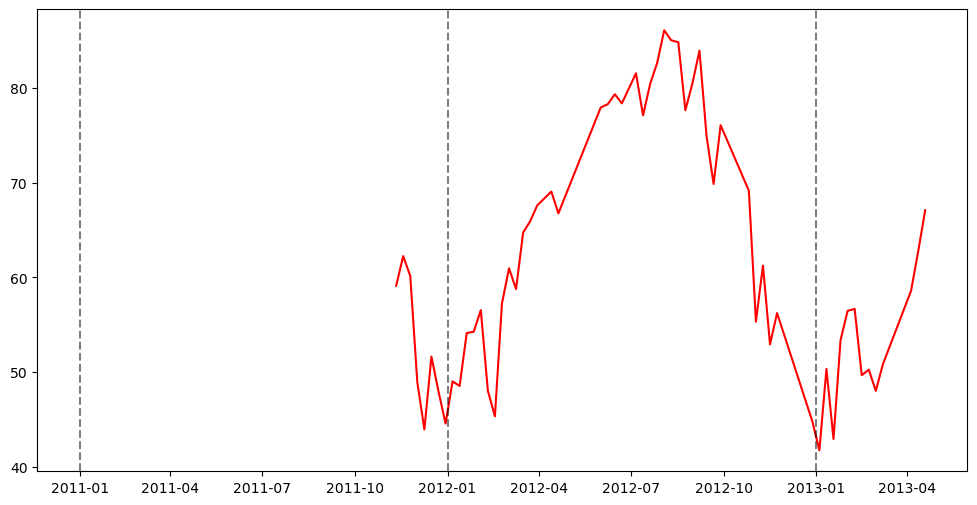

In [51]:
plot_series(Temp_df)

In [55]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(df.Fuel_Price, color='red')

    for year in range(2011, 2014):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

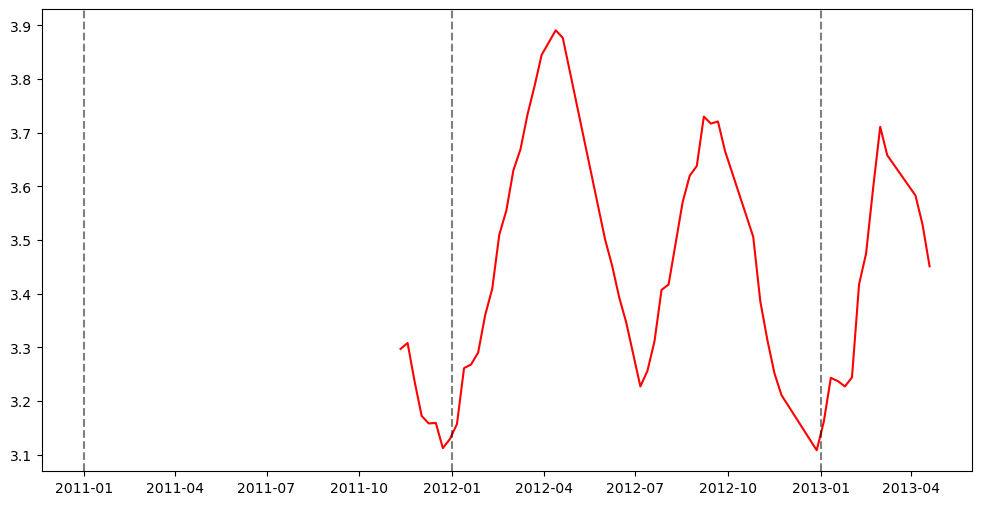

In [56]:
plot_series(df.Fuel_Price)

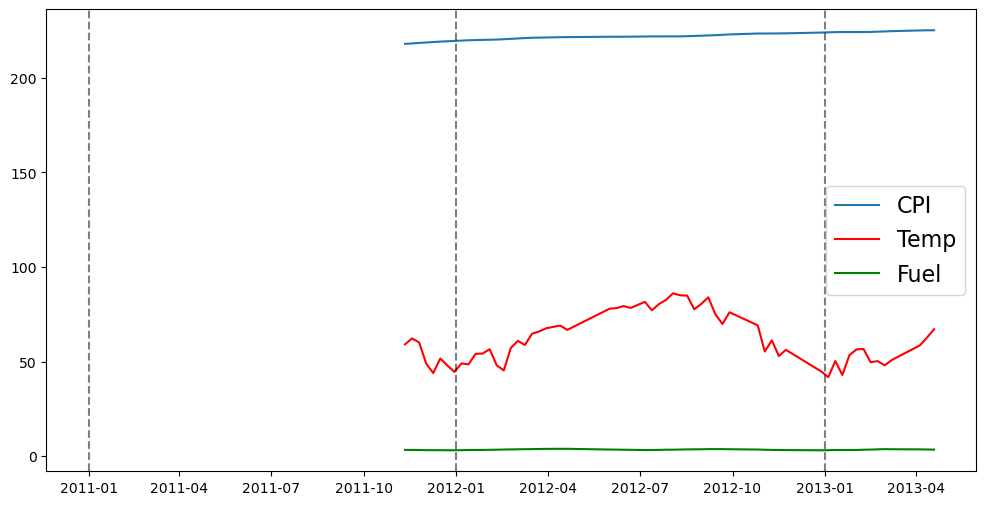

In [58]:
plt.figure(figsize=(12,6))
CPI, = plt.plot(df['CPI'])
Temp, = plt.plot(df['Temperature'], color='red')
Fuel, = plt.plot(df['Fuel_Price'], color = 'green')

for year in range(2011, 2014):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['CPI', 'Temp', 'Fuel'], fontsize=16)

In [59]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [60]:
print(adf_test(df['CPI']))
print('\n')
print(adf_test(df['Temperature']))
print('\n')
print(adf_test(df['Fuel_Price']))

ADF Statistics: -1.516942916873635
p- value: 0.5251138926737782
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None


ADF Statistics: -1.6535988227633616
p- value: 0.455164214190146
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None


ADF Statistics: -4.086714937273447
p- value: 0.001018671875311913
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


In [61]:
df = df.diff().dropna()

In [62]:
print(adf_test(df['CPI']))
print('\n')
print(adf_test(df['Temperature']))
print('\n')
print(adf_test(df['Fuel_Price']))

ADF Statistics: -5.0054823962480315
p- value: 2.1645319502154487e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


ADF Statistics: -8.461158172899639
p- value: 1.5659896320800225e-13
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


ADF Statistics: -4.630484204293546
p- value: 0.00011345065659479703
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


In [63]:
df = df.drop(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment', 'IsHoliday'], axis = 1)

In [64]:
df

,Temperature,Fuel_Price,CPI
Date,,,
2011-11-18,3.14,0.011,0.222424
2011-11-25,-2.11,-0.072,0.247112
2011-12-02,-11.23,-0.064,0.247112
2011-12-09,-4.98,-0.014,0.247112
2011-12-16,7.70,0.001,0.217608
2011-12-23,-3.67,-0.047,0.178268
2011-12-30,-3.41,0.017,0.178268
2012-01-06,4.46,0.028,0.178268
2012-01-13,-0.48,0.104,0.178268


In [235]:
print('Temperature causes CPI?\n')
granger_1 = grangercausalitytests(df[['CPI', 'Temperature']], 2)
print('\n')

print('------------------')
print('Fuel_Price causes CPI?\n')

granger_2 = grangercausalitytests(df[['CPI', 'Fuel_Price']], 2)

Temperature causes CPI?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9818  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.0006  , p=0.9812  , df=1
likelihood ratio test: chi2=0.0006  , p=0.9812  , df=1
parameter F test:         F=0.0005  , p=0.9818  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7015  , p=0.0767  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=5.9327  , p=0.0515  , df=2
likelihood ratio test: chi2=5.6390  , p=0.0596  , df=2
parameter F test:         F=2.7015  , p=0.0767  , df_denom=51, df_num=2


------------------
Fuel_Price causes CPI?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6726  , p=0.2014  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=1.7655  , p=0.1839  , df=1
likelihood ratio test: chi2=1.7387  , p=0.1873  , df=1
parameter F test:         F=1.6726  , p=0.2014  , df_denom=54, df_num=1

Granger Causality
number of l

In [71]:
df_train = df[:-12]
df_test = df[-12:]

In [72]:
df_train.shape

(46, 3)

In [73]:
df_test.shape

(12, 3)

In [75]:
model = VAR(df_train)

C:\Users\GAMES\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [79]:
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,-5.745,-5.613*,0.003198,-5.699
1,-5.866,-5.338,0.002842,-5.682
2,-5.663,-4.739,0.003526,-5.340
3,-5.374,-4.054,0.004851,-4.913
4,-5.109,-3.393,0.006695,-4.510
5,-5.289,-3.177,0.006166,-4.552
6,-5.191,-2.684,0.007943,-4.316
7,-5.071,-2.168,0.01140,-4.058
8,-5.937,-2.638,0.006982,-4.785
9,-6.733,-3.038,0.005735,-5.443


In [240]:
model_fit = model.fit(maxlags = 5)

In [241]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Jul, 2023
Time:                     09:49:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.72133
Nobs:                     41.0000    HQIC:                  -4.99694
Log likelihood:          -9.11648    FPE:                 0.00371121
AIC:                     -5.72746    Det(Omega_mle):      0.00138115
--------------------------------------------------------------------
Results for equation Temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.112424         2.262368           -0.050           0.960
L1.Temperature        -0.103653         0.187746           -0.552           0.581
L1.Fuel_Price          4.575947        12.184899  

# Final Equation

# C(t) = -0.006T(t-2) + (-0.44 C(t-3)) + 0.6C(t-5) + 0.08

In [242]:
# Predicting using VARMAX model

In [221]:
var_model = VARMAX(df_train, order=(10,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\GAMES\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GAMES\anaconda3.1\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                    Statespace Model Results                                    
Dep. Variable:     ['Temperature', 'Fuel_Price', 'CPI']   No. Observations:                   46
Model:                                          VAR(10)   Log Likelihood                  20.823
                                            + intercept   AIC                            156.354
Date:                                  Tue, 11 Jul 2023   BIC                            337.390
Time:                                          09:42:03   HQIC                           224.171
Sample:                                               0                                         
                                                   - 46                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):       1.71, 0.27, 0.24   Jarque-Bera (JB):    2.81, 23.77, 8.77
Prob(Q):                  0.19, 0.60, 0.63 

C:\Users\GAMES\anaconda3.1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [222]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

C:\Users\GAMES\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [223]:
predictions.columns = ['Temperature_predicted', 'Fuel_Price_Predicted', 'CPI_Predicted']
predictions = predictions['CPI_Predicted']

In [224]:
df_test

Date
2013-01-11    0.120569
2013-01-18    0.034261
2013-01-25   -0.000261
2013-02-01   -0.000261
2013-02-08   -0.000261
2013-02-15    0.041024
2013-02-22    0.144237
2013-03-01    0.144237
2013-03-08    0.144237
2013-04-05    0.377777
2013-04-12    0.083620
2013-04-19    0.000000
Name: CPI, dtype: float64

In [225]:
test_vs_pred=pd.concat([df_test,predictions],axis=1)

<AxesSubplot:>

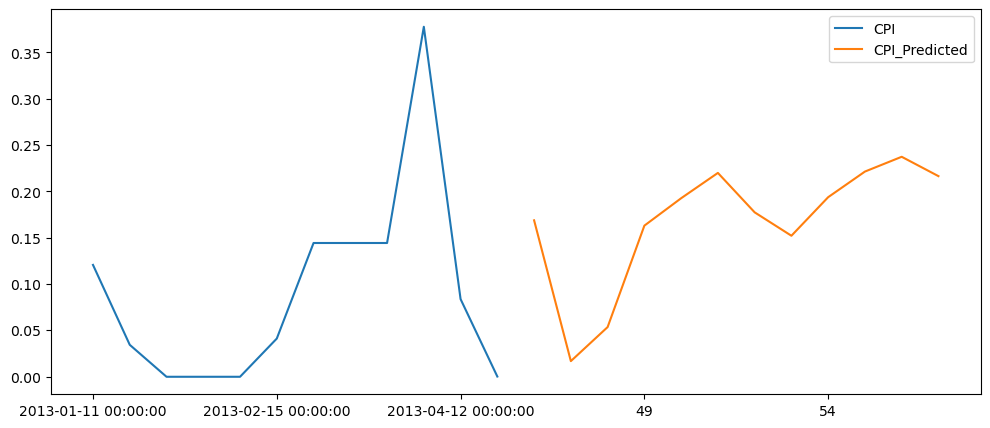

In [226]:
test_vs_pred.plot(figsize=(12,5))